In [5]:
import pandas as pd 
import numpy as np

df = pd.read_csv("minwage.csv", encoding="latin")

df.to_csv("minwage.csv", encoding="utf-8")

df = pd.read_csv("minwage.csv")


In [6]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,0,0,0,0,0,0,0,0,0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1,1,1,1,1,1,1,1,1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,2,2,2,2,2,2,2,2,2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,3,3,3,3,3,3,3,3,3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,4,4,4,4,4,4,4,4,4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
5,5,5,5,5,5,5,5,5,5,5,5,1968,Colorado,1.00 - 1.25(b),(b),1.25000,1.00000,34.783333,9.00,7.20
6,6,6,6,6,6,6,6,6,6,6,6,1968,Connecticut,1.40,NaN,1.40000,1.40000,34.783333,10.08,10.08
7,7,7,7,7,7,7,7,7,7,7,7,1968,Delaware,1.25,NaN,1.25000,1.25000,34.783333,9.00,9.00
8,8,8,8,8,8,8,8,8,8,8,8,1968,District of Columbia,1.25 - 1.40,NaN,1.40000,1.25000,34.783333,10.08,9.00
9,9,9,9,9,9,9,9,9,9,9,9,1968,Federal (FLSA),$1.15 & $1.60,NaN,1.60000,1.15000,34.783333,11.52,8.28


In [7]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


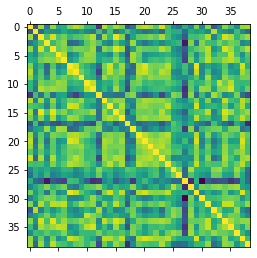

In [8]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

plt.show()

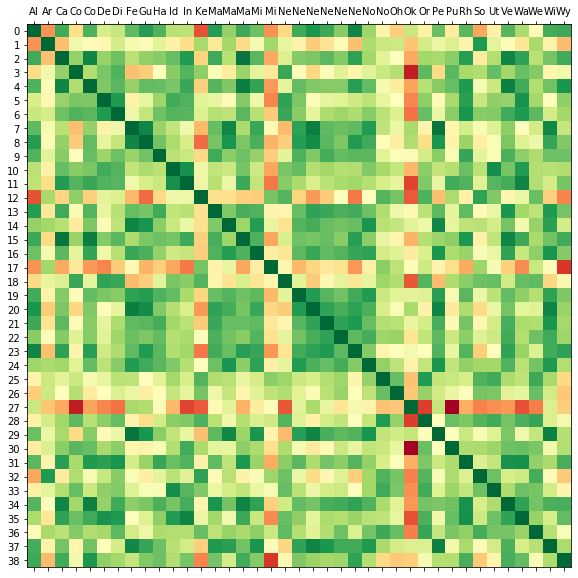

In [39]:
labels = [c[:2] for c in min_wage_corr.columns] # get abbv state names

fig = plt.figure(figsize=(10,10)) #figure to add axis
ax = fig.add_subplot(111) #define axis, now fully modifable 1:1

#set teh matshow first
ax.matshow(min_wage_corr, cmap =plt.cm.RdYlGn) #display the Matrix

ax.set_xticks(np.arange(len(labels))) #ticks, range labels
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels) #set to be the abbv
ax.set_xticklabels(labels) 

plt.show()

Our simple abbreviations aren't cutting it. We need something better. A quick google search found me https://www.infoplease.com/state-abbreviations-and-state-postal-codes, which contains a table.

In [40]:
labels

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Fe',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Pu',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [45]:
dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

#---!---
#issue (spyder)
#---!---
# import requests #!pip install requests

# web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
# dfs = pd.read_html(web.text)

In [46]:
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [47]:
state_abbv = dfs[0]

state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [48]:
state_abbv.to_csv("state_abbv.csv", index = False)

In [14]:
state_abbv = pd.read_csv("state_abbv.csv")
state_abbv.head()

,Unnamed: 0,State/District,Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


In [15]:
state_abbv[["State/District", "Postal Code"]].to_csv("state_abbv.csv", index=False) #only postal code

In [16]:
state_abbv = pd.read_csv("state_abbv.csv", index_col=0)
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [17]:
abbv_dict = state_abbv.to_dict() #make dictionary

abbv_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

In [49]:
abbv_dict = abbv_dict['Postal Code']
abbv_dict

KeyError: 'Postal Code'

In [50]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

In [51]:
abbv_dict['Federal (FLSA)'] = "FLSA"

In [52]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

In [53]:
abbv_dict['Guam'] = "GU"

In [54]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

In [55]:
abbv_dict['Puerto Rico'] = "PR"

In [56]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

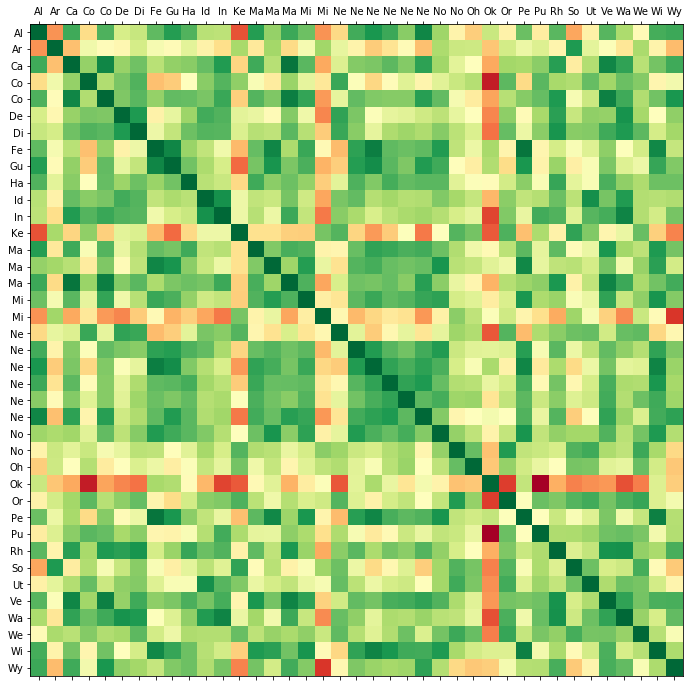

In [41]:
fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()